<hr>

#### => _The Spark Fountation- Data Science And Business Analytics Internship_

#### => _Task 1 - PREDICTION USING SUPERVISED ML_

#### => _**Task By : Manish Ghoshal**_

<hr>

# **Step 1 : Importing Libraries and Loading Dataset**


In [6]:
#Importing All The Requried Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [26]:
#Reading Data From The Source Link

data = pd.read_csv ('http://bit.ly/w-data')
print("~~~Data imported successfully~~~")

~~~Data imported successfully~~~


In [22]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
# Check if there any null value in the Dataset
data.isnull == True

False

####  (As there is no null value in the Dataset so, we can now visualize our Data)

# Step 2 : Visualizing The Dataset

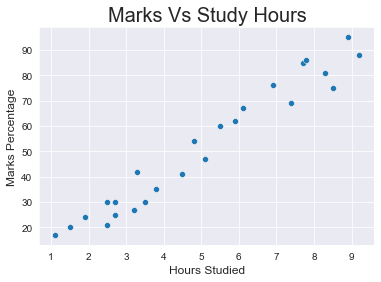

In [39]:
# Plotting The Dataset:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### **OBSERVATION : (From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation)

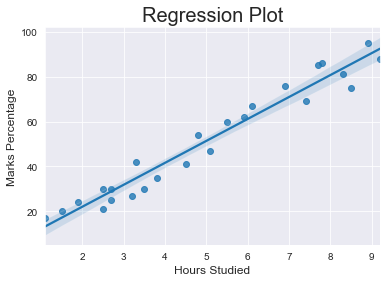

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#### (Hence it is confirmed that the variables are positively correlated)

# Step 3 : Training The Dataset

### 1) Splitting the Data:

In [11]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in Two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [12]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("-~-~-~-~-~-~-~-~-Model Training Complete-~-~-~-~-~-~-~-~-")

-~-~-~-~-~-~-~-~-Model Training Complete-~-~-~-~-~-~-~-~-


# Step 4:  Predicting the Percentage of Marks


In [13]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks :

In [14]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks :


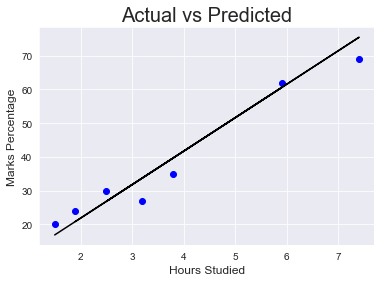

In [17]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


# Step 5:  Evaluating the Model

In [18]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


#### (Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less)

### SOLUTION : What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [19]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks

# Step 6: Model Evaluation Metrics

#### Evaluation metrics are a measure of how good a model performs and how well it approximates the relationship

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Checking the efficiency of model
mean_squ_error = mean_squared_error(val_y, y_pred[:5])
mean_abs_error = mean_absolute_error(val_y, y_pred[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

NameError: name 'y_pred' is not defined